In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [46]:
from sklearn.datasets import load_digits

In [47]:
mnist = load_digits()
#handwriting for digits

In [48]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
mnist.data.shape

(1797, 64)

In [50]:
mnist.target_names
#represents 1 to 9 digits as images

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

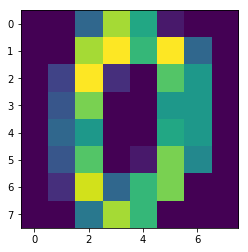

In [56]:
plt.imshow(mnist.images[0])

In [57]:
mnist.images.shape

(1797, 8, 8)

In [58]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [59]:
mnist.data[0].shape

(64,)

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [86]:
trainX, testX, trainY, testY = train_test_split(mnist.data, mnist.target)

In [87]:
scaler = MinMaxScaler()

In [88]:
pca = PCA(n_components=32)

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [91]:
pipe = Pipeline([
    ('caler',scaler), ('pca',pca), ('rf',rf)
])

In [92]:
pipe

Pipeline(memory=None,
     steps=[('caler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=No..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [93]:
from sklearn.grid_search import GridSearchCV

In [94]:
params = {
    'pca__n_components':[25,35],
    'rf__n_estimators':[25,35]
}

In [95]:
grid = GridSearchCV(pipe,cv=5,param_grid=params,n_jobs=-1)

In [96]:
grid.fit(trainX, trainY)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('caler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=No..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [25, 35], 'rf__n_estimators': [25, 35]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [102]:
grid.best_estimator_.score(trainX,trainY)

1.0

In [103]:
grid.best_params_

{'pca__n_components': 25, 'rf__n_estimators': 35}

In [111]:
class DigitClassifier:
    def __init__(self, classifier_list):
        self.clsf_list = classifier_list
        self.pipelines = []
        
    def create_pipeline(self,scaler,pca):
        for clsf in self.clsf_list:
            pipe = Pipeline([
                ('scaler',scaler),
                ('pca', pca), 
                ('clsf',clsf)
            ])
            self.pipelines.append(pipe)
            
    def fit(self, trainX, trainY):
        for pipe  in self.pipelines:
            pipe.fit(trainX, trainY)
            
    def score(self,testX, testY):
        for pipe in self.pipelines:
            print(pipe.score(testX,testY))
            
            

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
digit_clsf = DigitClassifier([DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()])

In [114]:
digit_clsf.create_pipeline(scaler, pca)

In [115]:
digit_clsf.fit(trainX, trainY)

In [116]:
digit_clsf.score(testX, testY)

0.82
0.92
0.9577777777777777
0.9888888888888889
